# Visuals and Arts 1

It is time to visualise and organise data into graphs. We have already done this of course but in this session we take a more systematic look.

In this session, we will learn about the grammar of graphics that Leland Wilkinson introduced in the book Grammar of Graphics, Springer, New York, 2005. https://towardsdatascience.com/a-comprehensive-guide-to-the-grammar-of-graphics-for-effective-visualization-of-multi-dimensional-1f92b4ed4149 discusses it for Python.

We will follow roughly the tutorial at http://tutorials.iq.harvard.edu/R/Rgraphics/Rgraphics.html, although the tutorial has many more examples and graphs than we will work with. But we will focus on a historical analysis and use the data and some examples from the excellent http://benschmidt.org/Crewlists. Later in the session we will apply our knowledge to data from museums.

The grammar of graphs defines independent building blocks for the things we want to do with graphs. Through their combination, the blocks give us any number of possible combinations to create perfect visualisations.

First we load the libraries always need. Run the cell below.

In [1]:
#Keep cell

import pandas as pd
import numpy as np
import sca


Next we load our favourite graphing library Matplotlib. We also add some more things like converters which will help us later to use dates in our visualisations. Run the next cell.

In [2]:
#Keep cell

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

Seaborn is a more recent Python data visualization library based on matplotlib. According to https://seaborn.pydata.org/, it 'provides a high-level interface for drawing attractive and informative statistical graphics.' It integrates easily with Pandas and provides an easier to use set of more high-level functions. So, load the library with `import seaborn as sns`.

In [3]:
import seaborn as sns

It is time to load the historical data, which is a 5000-entry sample of the New Bedford Whaling Museum's data on whalers mainly in the ninentheenth century. We choose it because it is like most cultural data very rich but also very messy. It shows that whaling was recruiting people from all over the world and was very large industry. Run the next cell to create crews.

In [4]:
#Keep cell

crews = pd.read_csv("data/crews-sample.csv")

The data is even as a sample too big to look at it as a whole, so let us go slow. Enter `crews.info()` to get a quick overview of the data.

In [5]:
crews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LastName              4992 non-null   object 
 1   FirstName             4995 non-null   object 
 2   Vessel                5000 non-null   object 
 3   Rig                   4991 non-null   object 
 4   ApproximateDeparture  4993 non-null   object 
 5   FullName              4999 non-null   object 
 6   Age                   2142 non-null   float64
 7   Height                1334 non-null   float64
 8   Skin                  2101 non-null   object 
 9   Hair                  2056 non-null   object 
 10  Eye                   6 non-null      object 
 11  Residence             2229 non-null   object 
 12  Rank                  2592 non-null   object 
 13  Lay.                  2254 non-null   object 
 14  Remarks               397 non-null    object 
 15  Voyage.number        

There are some promising features but the data really is very messy. 'Eye', e.g., only has 6 valid entries against 'Vessel' = 5000. Let's take a look at the data then with `crews.head()`. You know this already.

In [6]:
crews.head()

,LastName,FirstName,Vessel,Rig,ApproximateDeparture,FullName,Age,Height,Skin,Hair,Eye,Residence,Rank,Lay.,Remarks,Voyage.number,VesselNumber,date,height
0,Mitchell,Auguston Jr,Janet,Bark,2/19/1877,"Mitchell, Auguston Jr",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7357,354,NaN,NaN
1,Macy,George N.,Thomas Winslow,Brig,7/28/1846,George N. Macy,NaN,NaN,NaN,NaN,NaN,NaN,Greenhand,1-110,NaN,13879,661,NaN,NaN
2,Dearle,John,Franklin,Ship,9/3/1853,John Dearle,NaN,NaN,NaN,NaN,NaN,NaN,Greenhand,1-65,NaN,5231,219,1853-03-09,NaN
3,Couto,Joseph Antone,William Wilson,Schr,11/14/1878,"Couto, Joseph Antone",28.0,167.64,Dark,Dark,NaN,Brazil,Seaman,NaN,NaN,15759,710,NaN,66.0
4,Umara,NaN,Arab,Ship,11/18/1845,Umara,NaN,NaN,NaN,NaN,NaN,NaN,Ordinary,5/M,ON AT ZANZIBAR 06/28/1847,1161,899,NaN,NaN


There is too much for to go into. So, we decided to focus only on a few columns. 'Age', 'Height', 'date', 'Rig' and 'Skin'. Let's run `crews = crews[['Age', 'Height', 'date', 'Rig', 'Skin']]`.

In [7]:
crews = crews[['Age', 'Height', 'date', 'Rig', 'Skin']]

Because we like it tidy, we think that the column 'date' should be 'Date' inline with the other columns. A quick check of the Pandas documentation, tells us that this can be down with `crews.rename(columns = {'date': 'Date'}, inplace = True)`. inplace means that we do not create a new data frame.

In [8]:
crews.rename(columns = {'date': 'Date'}, inplace = True)

Looking back at our info() output, the 'Date' column should also not be object/string but a date format. In Pandas this is done with to_datetime, which requires the column to be transformed, the format that the dates are noted in (in Y, M and d but best check the documentation and the examples). Run `crews['Date'] = pd.to_datetime(crews['Date'], format='%Y-%m-%d', errors='coerce')`.

In [9]:
crews['Date'] = pd.to_datetime(crews['Date'], format='%Y-%m-%d', errors='coerce')

Now let's run `crews.info()` again and decide that our data looks good now.

In [10]:
crews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Age     2142 non-null   float64       
 1   Height  1334 non-null   float64       
 2   Date    2023 non-null   datetime64[ns]
 3   Rig     4991 non-null   object        
 4   Skin    2101 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 195.4+ KB


We can move on to our analysis. First, we are interested in the heights and ages of the whalers.

You can use the function value_counts() on a specific column to see how often each of its value occurs, we do this here for the Height column. Run `crews['Height'].value_counts()`.

In [11]:
crews['Height'].value_counts()

170.18    245
167.64    210
172.72    207
175.26    161
177.80    122
165.10    116
162.56     89
180.34     53
160.02     42
157.48     22
182.88     21
185.42     12
154.94     10
187.96      7
152.40      6
134.62      2
132.08      2
137.16      2
190.50      1
149.86      1
332.74      1
121.92      1
147.32      1
Name: Height, dtype: int64

Obviously this is a very centred distribution around a few very frequent values, which is very normal for values like human heights. We plot the distribution by using matplotlib. To this end, we first take the top 20 heights. As value_counts() returns a data frame, we can get those with head(). Run `height_20 = crews['Height'].value_counts().head(20)`.

In [12]:
height_20 = crews['Height'].value_counts().head(20)

Let's make a bar chart first (https://en.wikipedia.org/wiki/Bar_chart), which are well suited here. Bar charts are used to explore a single value and its frequency. Run `height_20.plot(kind='bar')`.

<AxesSubplot:>

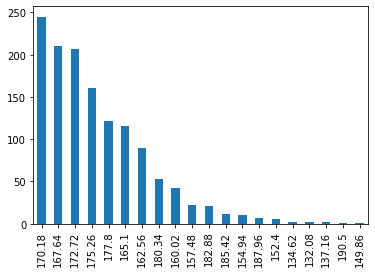

In [13]:
height_20.plot(kind='bar')

The seaborn package makes it easier (and prettier) to create a similar chart. This time, a histogram (https://en.wikipedia.org/wiki/Histogram) will help us see how 'Height' follows a normal distribution (https://en.wikipedia.org/wiki/Normal_distribution), which have been historically designed with these kinds of variables in mind. . 

Let's move on to seaborn and use `sns.histplot(data=crews, x='Height')`.

<AxesSubplot:xlabel='Height', ylabel='Count'>

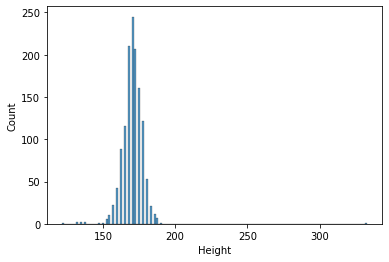

In [14]:
sns.histplot(data=crews, x='Height')

That is a normal distribution! Can you create a histogram for 'Age'? Hint: data defines the data frame and x the column to look at ...

<AxesSubplot:xlabel='Age', ylabel='Count'>

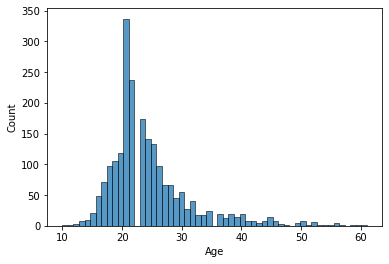

In [15]:
sns.histplot(data = crews, x = 'Age')

We often want to compare, however, the relative distribution of 2 or more variables. So, for instance, we are interested in the relationship between  and date of the whalers’ journey. Maybe, this shows that people get taller over time? Or maybe not. Let’s try. 

Here, we have several points to map onto a coordinate system of two numerical variables. https://en.wikipedia.org/wiki/Scatter_plot are are popular choice here. The syntax is similar to the histogram. Run `sns.scatterplot(data=crews, x='Date', y='Height')`. 

<AxesSubplot:xlabel='Date', ylabel='Height'>

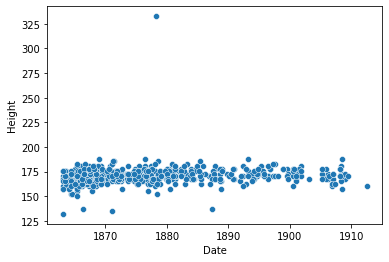

In [16]:
sns.scatterplot(data=crews, x='Date', y='Height')

You might have already noticed the most important questions to ask when beginning to plot. The first question is how many variables you have? The second is whether these variables are numerical or categorical? We have not covered categorical variables yet. This will come later. These two questions will determine what kind of plot you can do. 

While we did everything right, ee have not really got an answer to the question whether people become taller, as the plot contains too many points. The graph shows how difficult it is to plot even this fairly small real world dataset. Do you remember our brief discussion of 'bad data' in an earlier session? There seem to be some suspicious outliers of very tall or very small whalers - height is in cm btw. If points in a scatterplot are so close, there will be various options to correct this. 

The easiest is to change the aesthetics to make the points more transparent using the alpha-parameter. Furthermore, we would like to change the colour of the points in the next plot (with 'color'). Run `sns.scatterplot(data=crews, x='Date', y='Height', alpha=0.15, color='red')`.

<AxesSubplot:xlabel='Date', ylabel='Height'>

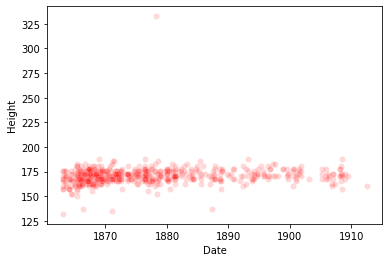

In [17]:
sns.scatterplot(data=crews, x='Date', y='Height', alpha=0.15, color='red')

Our plot of crews shows many data points and significant overlap. Under these conditions, scatterplots become less useful. We have tried to change the alpha parameter to make the points more visible. Another approch is to bin the points into hexagonal cells, which is less complicated than it sounds. 

While it is good to show some ambition, we run into another problem. Seaborn cannot work at the moment with calculations over date types - as far as I know. So, we need to help it. We do with a simple trick. We realise that our plots are not so much dependent on the exact date but on the year. This is all we can represent in our x-axis. So, we use the year for our calculations, which is nice mumerical value and not a date type. 

In Pandas, it is easy to extract the year from a date type with DatetimeIndex on the 'Date' column. Run `crews['Year'] = np.array(pd.DatetimeIndex(crews['Date']).year)`

In [18]:
crews['Year'] = np.array(pd.DatetimeIndex(crews['Date']).year)

`crews.info()` tells us that we successfully created a 'Year' column of type float64, which we can use to make complex calculations.

In [19]:
crews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Age     2142 non-null   float64       
 1   Height  1334 non-null   float64       
 2   Date    2023 non-null   datetime64[ns]
 3   Rig     4991 non-null   object        
 4   Skin    2101 non-null   object        
 5   Year    2023 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 234.5+ KB


Run now the same scatter plot command as above to retrieve the whalers’ height but use jointplot insteaad of scatterplot and add kind='hex' at the end: `sns.jointplot(x=crews.Year, y=crews.Height, alpha=0.15, color='red', kind='hex')`. It is a very strong visualisation of the relation of the variables.

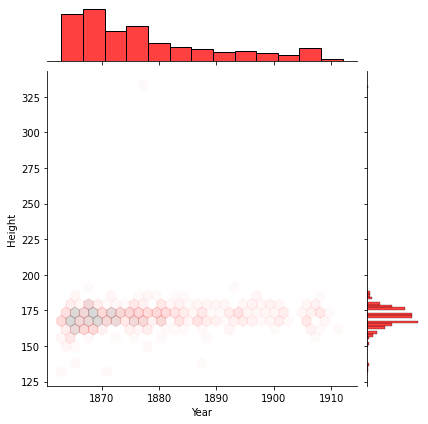

In [20]:
sns.jointplot(x=crews.Year, y=crews.Height, alpha=0.15, color='red', kind='hex')

Looking at the plot, we should also be concerned that we have much more data for the earlier periods. In a real data analysis, this could be a big problem. Here, we just move on.

Btw, have you noticed that we used crews.Year and crews.Height instead of crews['Year'] and crews['Height']. We  also skipped the data argument and addressed x and y directly. The crews.Year form is simply a short form, which can be useful if the expressions get too complicated. It is slightly less distracting on the eye, I think. But the best version is still `sns.jointplot(data=crews, x='Year', y='Height', alpha=0.15, color='red', kind='hex')`, with an explicit data argument. So, let's return to this.

We asked earlier about the relation between the date and the height of the whalers. In statistics speech, the relation between two numerical variables can be found through calculating the linear regression. In seaborn, regplot plots the data and a linear regression based on it. Try: `sns.regplot(data=crews, x='Year', y='Height')`.

<AxesSubplot:xlabel='Year', ylabel='Height'>

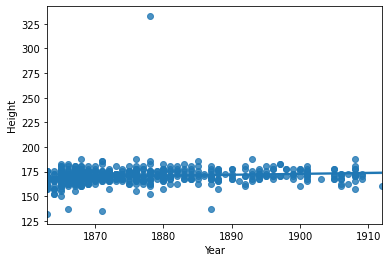

In [21]:
sns.regplot(data = crews, x='Year', y='Height')

We still do not have a clear idea od the relationship of the whalers’ height and the date of the journey.  we cannot really see the regression line here, so let's change the colors and make the points more transparent again. Simply take a close look at our next command `sns.regplot(data=crews, x='Year', y='Height', scatter_kws={'color': 'blue', 'alpha':0.3}, line_kws={"color": "red"})`. You will see that the two additional arguments ending in _kws_ define a dictionary of attributes for the scatter points and (regression) line.  

<AxesSubplot:xlabel='Year', ylabel='Height'>

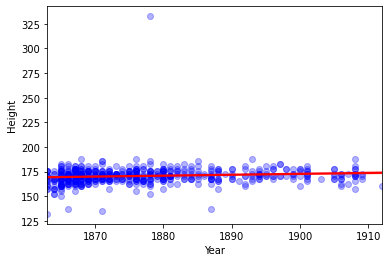

In [22]:
sns.regplot(data=crews, x='Year', y='Height', scatter_kws={'color': 'blue', 'alpha':0.3}, line_kws={"color": "red"})

There is a nice  regression line in the graph now, which is fairly constant in terms of the height per year. There is a slight increase but nothing to really support our hypothesis. Most likely, our data is not big enough to come to a conclusion. Also, we had the problem of an uneven spread of our data across the years. But we move on.

For completeness, we continue by introducing a few more graphics ideas. We mentioned that we can also add categorical variables to a plot. We could make one of the axes categorical, but here we would like to show how to add a third and even a forth variable. Let's try and show the skin color in the plot as well and later on also the skin colour of the whalers.

From experience we have too many categories of skins. So, we need to reduce the dataset. We do this by creating a new data frame and dropping all rows with NaN values. Run the next cell.

In [23]:
#Keep cell
crews_cat = crews[['Date', 'Year', 'Height', 'Rig', 'Skin']]
crews_cat = crews_cat.dropna()
crews_cat.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519 entries, 12 to 4958
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    519 non-null    datetime64[ns]
 1   Year    519 non-null    float64       
 2   Height  519 non-null    float64       
 3   Rig     519 non-null    object        
 4   Skin    519 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 24.3+ KB


This has reduced our data quite a bit to 519 entries. We can now add 'Rig' to the visualisation. We use the colour of the scatter points to visualise the different types of rigs. If you you change in a seaborn graph an parameter to the name of a column in the data, then it will try to match the values in that column. In our case, we need the parameter hue according to the scatterplot documentation. Run `sns.scatterplot(data=crews_cat, x='Year', y='Height', alpha=0.15, hue='Rig')`.

<AxesSubplot:xlabel='Year', ylabel='Height'>

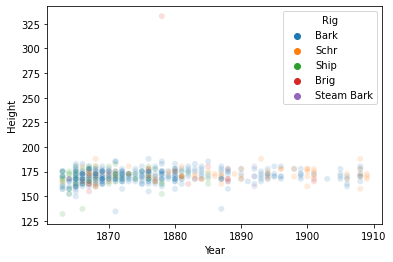

In [24]:
sns.scatterplot(data=crews_cat, x='Year', y='Height', alpha=0.15, hue='Rig')

Not bad but we cannot really see a relation. Let's add in 'Skin' using the style parameter, which define the shape of the points. Type in `sns.scatterplot(data=crews_cat,x = 'Year', y = 'Height', alpha=0.15, hue='Rig', style='Skin')`

<AxesSubplot:xlabel='Year', ylabel='Height'>

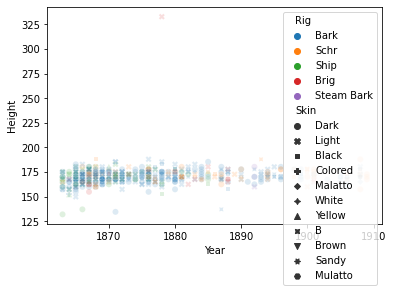

In [25]:
sns.scatterplot(data=crews_cat,x = 'Year', y = 'Height', alpha=0.15, hue='Rig', style='Skin')

Oh well, the graph is not as useful as hoped. Too much information. There are simply too many points and in particular skin colours. Maybe, it would have been better to use test data than real life data, but at least you should get a feeling of the challenges we face with social and cultural data. In the real life of data, you often try, fail and try again until you get something nice. One last try though, as we are quite interested in the skin colours of the whalers. 

If we have many different aspects to look at, facetted plots can be useful. Try and be amazed:
```
g = sns.FacetGrid(crews_cat, col="Skin", col_wrap = 4)
g.map(sns.scatterplot, 'Year', 'Height', alpha=0.15)

```
FaceGrid maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to levels of variables in the dataset.

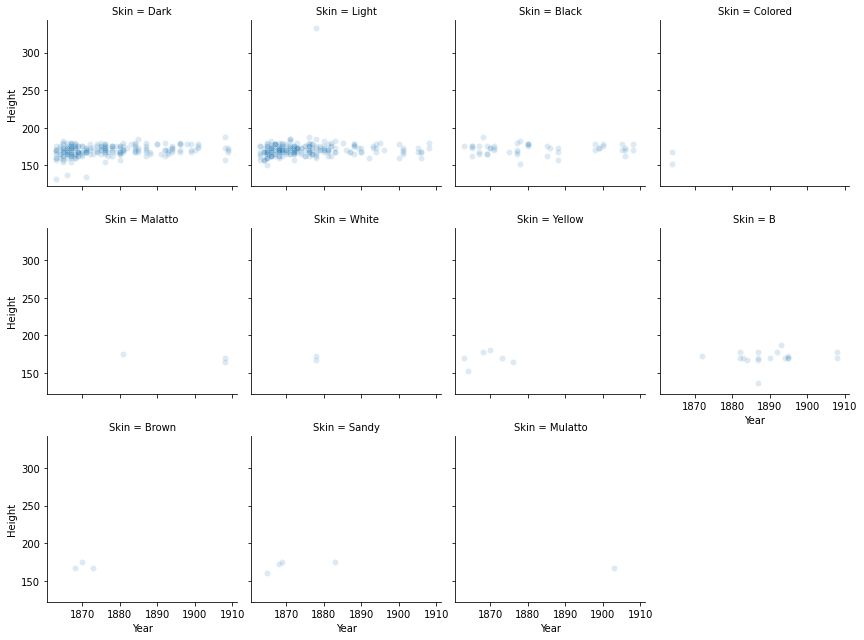

In [26]:
g = sns.FacetGrid(crews_cat, col="Skin", col_wrap = 4)
g.map(sns.scatterplot, 'Year', 'Height', alpha=0.15)

If you zoom in to the new graph, you will notice some differences in terms of the height but also of the dates when whalers of particular skin types were recorded. Also, it was even for this small subset of data a very diverse group of people. But the graph is still very complicated, and it is not easy to draw any conclusion from it.

Overall, http://benschmidt.org/Crewlists had a better idea by trying to analyse the relationship of age and height of whalers. As an exercise, let us start from the beginning ...

Run a scatterplot with the whole crews data over 'Age' and 'Height'. Define the color as red and alpha=0.15

<AxesSubplot:xlabel='Age', ylabel='Height'>

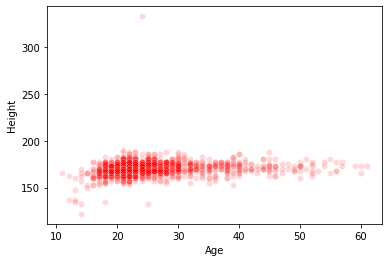

In [27]:
sns.scatterplot(data=crews,x='Age', y='Height', color='red', alpha=0.15)

Ok, there seems to be a real relationship between age and height. But again, many values are missing. We do not like this and hence define a new data frame that contains only full 'Age' and 'Height' records by removing the NaN values. Try `crews_ag = crews[['Age', 'Height']].dropna()`.

In [28]:
crews_ag = crews[['Age', 'Height']].dropna()

Next run the scatterplot again with crews_ag.

<AxesSubplot:xlabel='Age', ylabel='Height'>

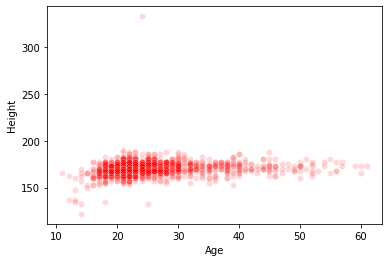

In [29]:
sns.scatterplot(data=crews_ag,x='Age', y='Height', color='red', alpha=0.15)

Next we would like to manually and personally add a regression line to see whether our hypothesis about the relationship of the variables is right. 

We will use from the stats library the linregress function. Load it with `from scipy.stats import linregress`.

In [30]:
from scipy.stats import linregress

To create a regression, we need to run `slope, intercept, _, _, _ = linregress(crews_ag['Age'], crews_ag['Height'])`. The function returns five values, but we are only interest in the first two, which is why we ignore the remaining three by using _.

In [31]:
slope, intercept, _, _, _ = linregress(crews_ag['Age'], crews_ag['Height'])

Do you remember from school what slope and intercept stand for? You are right, slope indicates the steepness of the line, and the intercept indicates the location where it intersects the y-axis. Let's print out both. Run the next cell.

In [32]:
#Keep cell
print(slope)
print(intercept)

0.143483378185422
166.87316846747345


The slight slope shows that height increases with age, although the approximation is not great, as people do not really get taller beyond a certain age. Nevertheless, congratulations are in order. You have proven that whalers get taller when they become older.

Let's get on with our plotting and create a new column to hold our height-prediction information. A regression is of course nothing else but y = slope * x + intercept, which means in our case: 

```crews_ag['HeightPrediction'] = np.array(crews_ag['Age']) * slope + intercept```

x is the age and y is the predicted height.

In [33]:
crews_ag['HeightPrediction'] = np.array(crews_ag['Age']) * slope + intercept

The good news is that you can just add a line plot to the existing scatter plot to create the complete regression. Run in one cell:
```
sns.scatterplot(data=crews_ag,x='Age', y='Height', color='blue', alpha=0.15)
sns.lineplot(data=crews_ag, x='Age', y='HeightPrediction', color='red')
```
Check also the seaborn cheat sheet: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf

<AxesSubplot:xlabel='Age', ylabel='Height'>

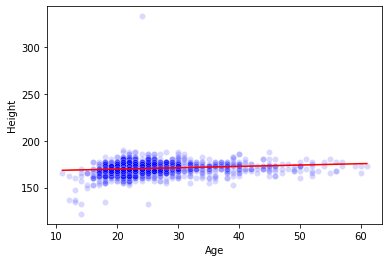

In [34]:
sns.scatterplot(data=crews_ag,x='Age', y='Height', color='blue', alpha=0.15)
sns.lineplot(data=crews_ag, x='Age', y='HeightPrediction', color='red')

Next to something hopefully altogether more exciting to deal with. 

We move on from whaling cultures to museums and your future job as an analyst there. Several arts museums around the world publish their collections’ metadata online. Very popular is, for instance, New York’s Museum of Modern Art (MoMA) collection data (https://github.com/MuseumofModernArt/collection). Let us take a look at their artworks’ information. Please note that this data is refreshed monthly and fairly large with over 50 MB at the time of writing. So, if you download it now you might see some differences to our suggested data frame moma_artworks, which is just a sample. Run the next cell.

In [35]:
#Keep cell

moma_art = pd.read_csv("data/moma-artworks-sample.csv", index_col=False)

Type in `moma_artworks.head()` to take a look at the first rows. For the rest of the MoMA exercises, we take inspiration from http://sebastianbarfort.github.io/ who many years ago came up with this task.

In [36]:
moma_art.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,Diary,Richard Smith,5493,"(British, 1931–2016)",(British),(1931),(2016),(Male),1975,Screenprint on seven sheets with punched hole ...,...,http://www.moma.org/media/W1siZiIsIjE1NjU5MyJd...,NaN,NaN,NaN,52.000000,NaN,NaN,52.200000,NaN,NaN
1,"Trial proof for ""Have Mercy Upon Me, Oh God, A...",Georges Rouault,5053,"(French, 1871–1958)",(French),(1871),(1958),(Male),"(Book commissioned, but unpublished by Vollard...","Aquatint, lift ground aquatint, and drypoint o...",...,http://www.moma.org/media/W1siZiIsIjIxOTkxMyJd...,NaN,NaN,NaN,60.000000,NaN,NaN,44.700000,NaN,NaN
2,"Beth Sholom Synagogue, Elkins Park, Pennsylvania",Frank Lloyd Wright,6459,"(American, 1867–1959)",(American),(1867),(1959),(Male),1954,Drawing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Untitled,Alan Saret,5163,"(American, born 1944)",(American),(1944),(0),(Male),(1970),Colored pencil on paper,...,http://www.moma.org/media/W1siZiIsIjM0MTk4NyJd...,NaN,NaN,NaN,61.200000,NaN,NaN,96.500000,NaN,NaN
4,"Remodelling of Modlinger House, Wannsee, Berli...",Lilly Reich,8059,"(German, 1885–1947)",(German),(1885),(1947),(Female),1930-1931,Pencil and colored pencil on print,...,NaN,NaN,NaN,NaN,44.450089,NaN,NaN,45.720091,NaN,NaN


In this part, let’s pretend you work for MoMA, and your manager has asked you to create a visualisation showcasing the development of the museum stock. Next to the moma_artworks, I have also created the moma_stock data frame. We would like to know how the stock has developed in recent years and visualise it. Run the next cell and observe the argument parse_date which allows you to specify which columns should be parsed for the date format.

In [37]:
#Keep cell

moma_stock = pd.read_csv("data/moma-stock.csv", parse_dates=['date'])

Check out the first few records of moma_stock.

In [38]:
moma_stock.head()

,date,supply,stock
0,1929-11-01,9,9
1,1930-01-01,3,12
2,1930-04-01,2,14
3,1930-06-01,1,15
4,1930-10-01,2,17


Next, we draw a simple red line to represent the stock development. Try whether you can use sns.lineplot with moma_stock. x='date' and y='stock'.

<AxesSubplot:xlabel='date', ylabel='stock'>

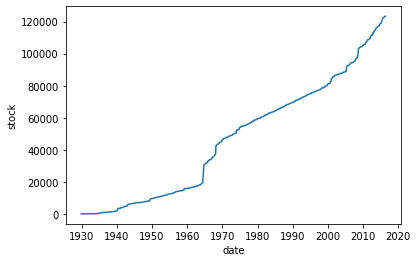

In [39]:
sns.lineplot(data=moma_stock, x='date', y='stock')

There is a definite jump in holdings from the late 1960s onwards. Or is this simply a recording issue? We cannot know  and would have to do further research. 

Let’s investigate the development of MoMA departments next. moma_departments contains the stocks per department. Run the next cell.

In [40]:
#Keep cell
moma_dep = pd.read_csv("data/moma-departments.csv", parse_dates=['date'])
moma_dep.head()

,date,Department,supply,stock
0,1932-01-01,Architecture & Design,2,2
1,1934-01-01,Architecture & Design,2,4
2,1934-04-01,Architecture & Design,43,47
3,1934-09-01,Architecture & Design,4,51
4,1935-11-01,Architecture & Design,22,73


Let's plot the development of the stock of each department by setting a different color for each department by using hue='Department', just as we did with the whalers' Rig. You can do it ... Hint: x='date' and y='stock'.

<AxesSubplot:xlabel='date', ylabel='stock'>

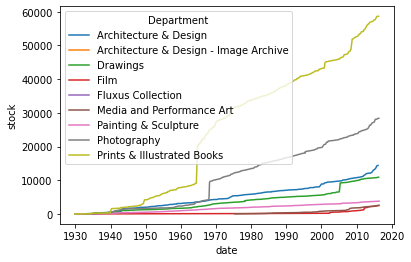

In [41]:
sns.lineplot(data=moma_dep, x='date', y='stock', hue='Department')

Well done! But you are rather nervous about showing this to your manager, the legend is covering most of the view of the plot, which makes it a bit messy. You would like to change the look and feel a bit.

Seaborn has five built-in themes to style its plots: darkgrid, whitegrid, dark, white, and ticks: http://seaborn.pydata.org/tutorial/aesthetics.html Seaborn defaults to using the darkgrid theme for its plots, but you can change this styling to better suit your presentation needs.

To use any of the preset themes pass the name of it to sns.set_style().
(https://www.codecademy.com/articles/seaborn-design-i)

However, these do not include the possibility to change the background colour, which we want to do. For this, we need to use the built-in styles of matplotlib, plt.style.use(). Run: `plt.style.use('dark_background')`.

In [42]:
plt.style.use('dark_background')

Now run the lineplot again with date and stock and hue='Department'.

<AxesSubplot:xlabel='date', ylabel='stock'>

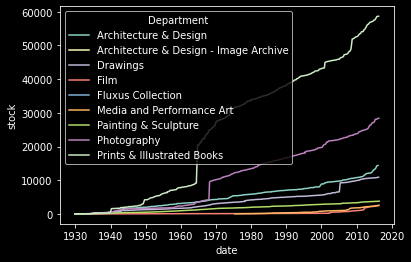

In [43]:
sns.lineplot(data=moma_dep,x='date', y='stock', hue='Department')

It's black, but the position of the legend seems to be even worse now. Luckily, we can also change this using matplotlib's plt.legend(), where we use the argument bbox_to_anchor=(1.01, 1) to tell it the coordinates of where the legend needs to go. Finding the correct coordinates is a bit of trial and error, which we have already done for you ...

Run and observe how you can compose a graphics from different element following on the grammar of graphics:
```
sns.lineplot(data=moma_dep,x='date', y='stock', hue='Department')
plt.legend(bbox_to_anchor=(1.01, 1))
```

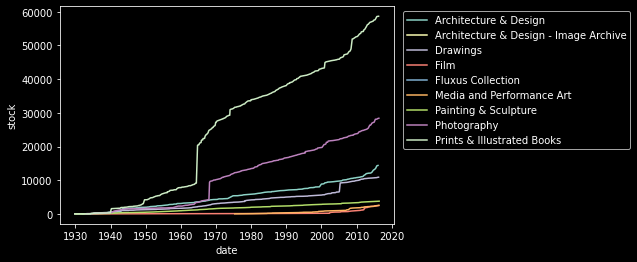

In [44]:
sns.lineplot(data=moma_dep,x='date', y='stock', hue='Department')
plt.legend(bbox_to_anchor=(1.01, 1))

Hmm, it still doesn't look completely right, the size of the labels on the x-axis seem a little bit too big. Let's change this as well using Matplotlib's tick_params() because we can. Run the cell below and observe again how we incrementally can add more and more elements to the graph until we get it right.

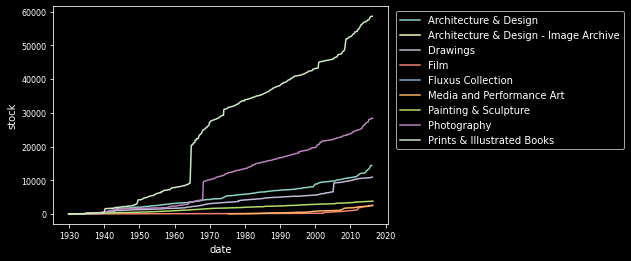

In [45]:
#Keep cell

sns.lineplot(data=moma_dep,x='date', y='stock', hue='Department')
plt.legend(bbox_to_anchor=(1.01, 1))
plt.tick_params(labelsize=8)

Before we continue, we need to reset the style to default to avoid use dark backgrounds for the rest of the session. Run `plt.style.use('default')`.

In [46]:
plt.style.use('default')

Your manager likes it! 

After your success at MoMA, why not start at the TATE-galleries in Britain? Your first task is to compare visitor numbers. You have been given a data frame tate_attendance. Run the next cell.

In [47]:
#Keep cell
tate_attendance = pd.read_csv("data/tate-visitors.csv")
tate_attendance.head(20)

,year,gallery,visitors
0,2006,Britain,1665
1,2007,Britain,1533
2,2008,Britain,1587
3,2009,Britain,1576
4,2010,Britain,1606
5,2011,Britain,1465
6,2012,Britain,1396
7,2013,Britain,1419
8,2014,Britain,1373
9,2015,Britain,1273


tate_attendance obviously contains the visitor numbers since 2006 for all TATE-galleries in Britain. You are eager to plot it in order to compare visitor developments and you heard that the wonderful area plots would do a great job at it. There is no seaborn area plot but Matplotlib has one: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.area.html

You soon realise that there is an issue with the format. It has been created as ‘tidy data’, as defined by Hadley Wickham in the Journal of Statistical Software (https://www.jstatsoft.org/article/view/v059i10/v59i10.pdf). In tidy data, each row is an observation and each column contains the values of a variable (i.e. an attribute of what we are observing). It is also called narrow format as in https://en.wikipedia.org/wiki/Wide_and_narrow_data (sometimes this distinction is also called long and wide). 

Matplotlib's area plot requires wide data. So, you need to transform the data. This is easily done in Python with pivot, which takes: an index to use (in this case the year); columns, which define the new column(s), which the names of the new wide columns are found; and the values to put in the cells. Run

```
tate_wide = tate_attendance.pivot(index='year', columns = 'gallery', values='visitors')
tate_wide.head()
```

In [48]:
tate_wide = tate_attendance.pivot(index='year', columns = 'gallery', values='visitors')
tate_wide.head()

gallery,Britain,Liverpool,Modern,StIves
year,,,,
2006,1665,566,5235,241
2007,1533,691,5237,244
2008,1587,1036,4648,204
2009,1576,523,4788,219
2010,1606,606,5035,199


Pivotting and its opposite from wide to long called melting (check out the Pandas 'melt' function) require some practice but are essentinal skills. So, spend some time after this session on the documentation. Here is the cheat sheet: http://datacamp-community-prod.s3.amazonaws.com/d4efb29b-f9c6-4f1c-8c98-6f568d88b48f

You are almost there. Creating the plot is easy now with `tate_wide.plot(kind='area')`.

<AxesSubplot:xlabel='year'>

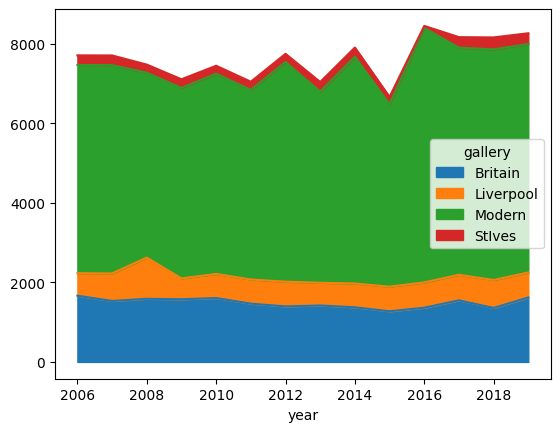

In [49]:
tate_wide.plot(kind='area')

Success! We have made great progress in the art of plotting and grammar of graphics.